In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import *

In [12]:
#Set up example sample
sample = []
for i in np.arange(23):
    sample.append("y")
for i in np.arange(77):
    sample.append("n")
sample = np.array(sample)
    
data = pd.DataFrame(sample, columns = ["Hilfungus Cases"])

# Defining Hypotheses

Null Hypothesis: The true proportion of students at Berkeley with HIlfungus is 20%.

Alternate Hypothesis: The true proportion of Berkeley students with Hilfungus is not 20%.

# Choosing a Test Statistic

We choose to use a proportion

# Calculate the Observed Value

In [13]:
obsVal = sum(data['Hilfungus Cases'] == "y")/len(data)
obsVal

0.23

# Bootstrap

In [14]:
#Bootstrap the sample once

def single_bootstrap(tbl):
    bootstrap = tbl.sample(len(tbl), replace = True)
    return sum(bootstrap['Hilfungus Cases'] == "y")/len(bootstrap)

In [15]:
#Bootstrap the sample 10000 times

props = []
for i in np.arange(10000):
    props.append(single_bootstrap(data))
props = np.array(props)
props

array([0.3 , 0.22, 0.23, ..., 0.19, 0.27, 0.2 ])

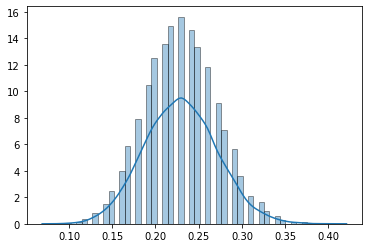

In [16]:
t = pd.DataFrame(props, columns = ["Estimated Proportion"])
sns.distplot(t)

In [ ]:
#Calculate bounds of Confidence Interval

lower_bound = np.percentile(props, 2.5)
upper_bound = np.percentile(props, 97.5)
print("Bootstrapped 95% confidence interval for the proportion of people with Hilfungus in the population: [{:f}, {:f}]".format(lower_bound, upper_bound))

In [18]:
#Calculate p-value

p_val = sum(props >= 0.2)/len(props)

0.7138